# Importing libraries

In [1]:
!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e53d514a1ada90e850a30df110528f0aaccbd635851814e72399871241cc78f0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [3]:
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler

# Steane code encoding

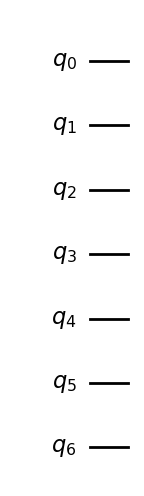

In [4]:
qc = QuantumCircuit(7)
qc.draw('mpl')

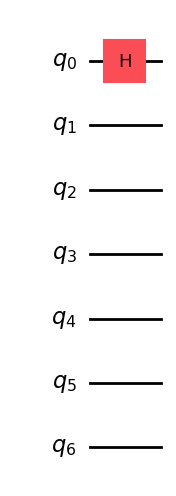

In [5]:
qc.h(0)
qc.draw('mpl')

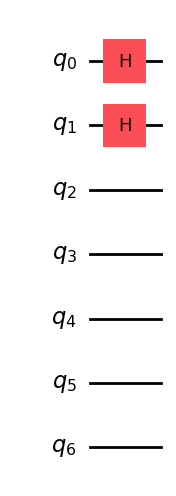

In [6]:
qc.h(1)
qc.draw('mpl')

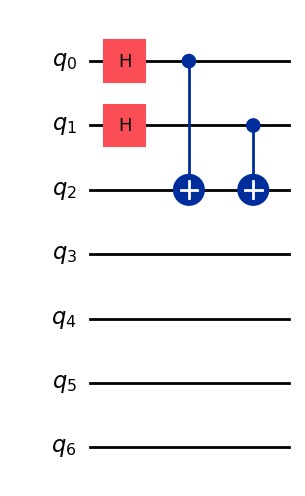

In [7]:
qc.cx(0, 2)
qc.cx(1, 2)
qc.draw('mpl')

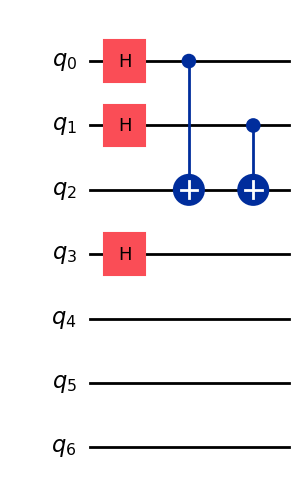

In [8]:
qc.h(3)
qc.draw('mpl')

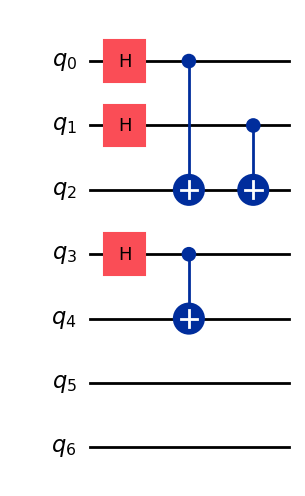

In [9]:
qc.cx(3, 4)
qc.draw('mpl')

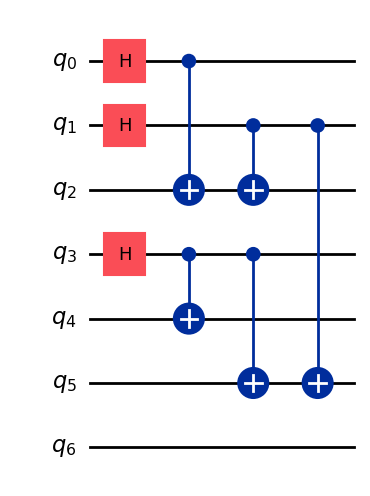

In [10]:
qc.cx(3, 5)
qc.cx(1, 5)
qc.draw('mpl')

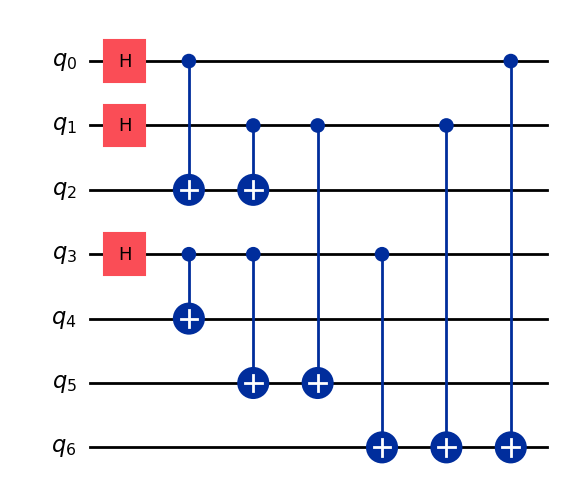

In [11]:
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.draw('mpl')

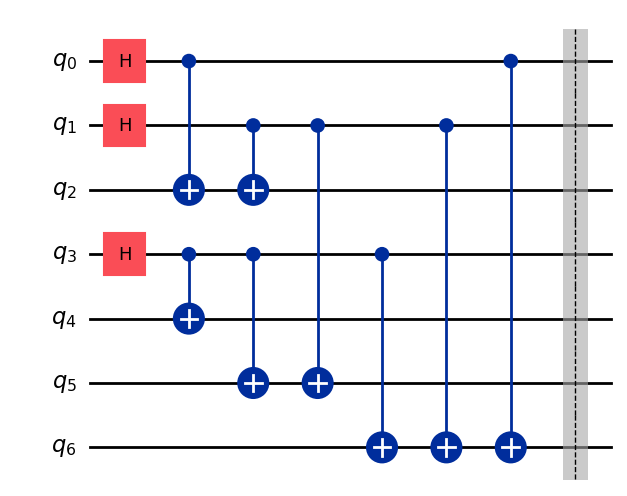

In [12]:
qc.barrier()
qc.draw('mpl')

In [13]:
def Steane(qc):
  qc.h(0)
  qc.h(1)
  qc.cx(0, 2)
  qc.cx(1, 2)
  qc.h(3)
  qc.cx(3, 4)
  qc.cx(3, 5)
  qc.cx(1, 5)
  qc.cx(3, 6)
  qc.cx(1, 6)
  return qc

A function is defined to generate an encoded steane code

In [14]:
def Steane(qc):
  qc.h(0)
  qc.h(1)
  qc.cx(0, 2)
  qc.cx(1, 2)
  qc.h(3)
  qc.cx(3, 4)
  qc.cx(3, 5)
  qc.cx(1, 5)
  qc.cx(3, 6)
  qc.cx(1, 6)
  return qc

# Encoded Z measurement

In [15]:
for i in range(7):
  qc.z(i)
qc.measure_all()

In [16]:
sampler = StatevectorSampler()
pub =(qc)
job_sampler =sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'0100011': 1}


# Verification of state

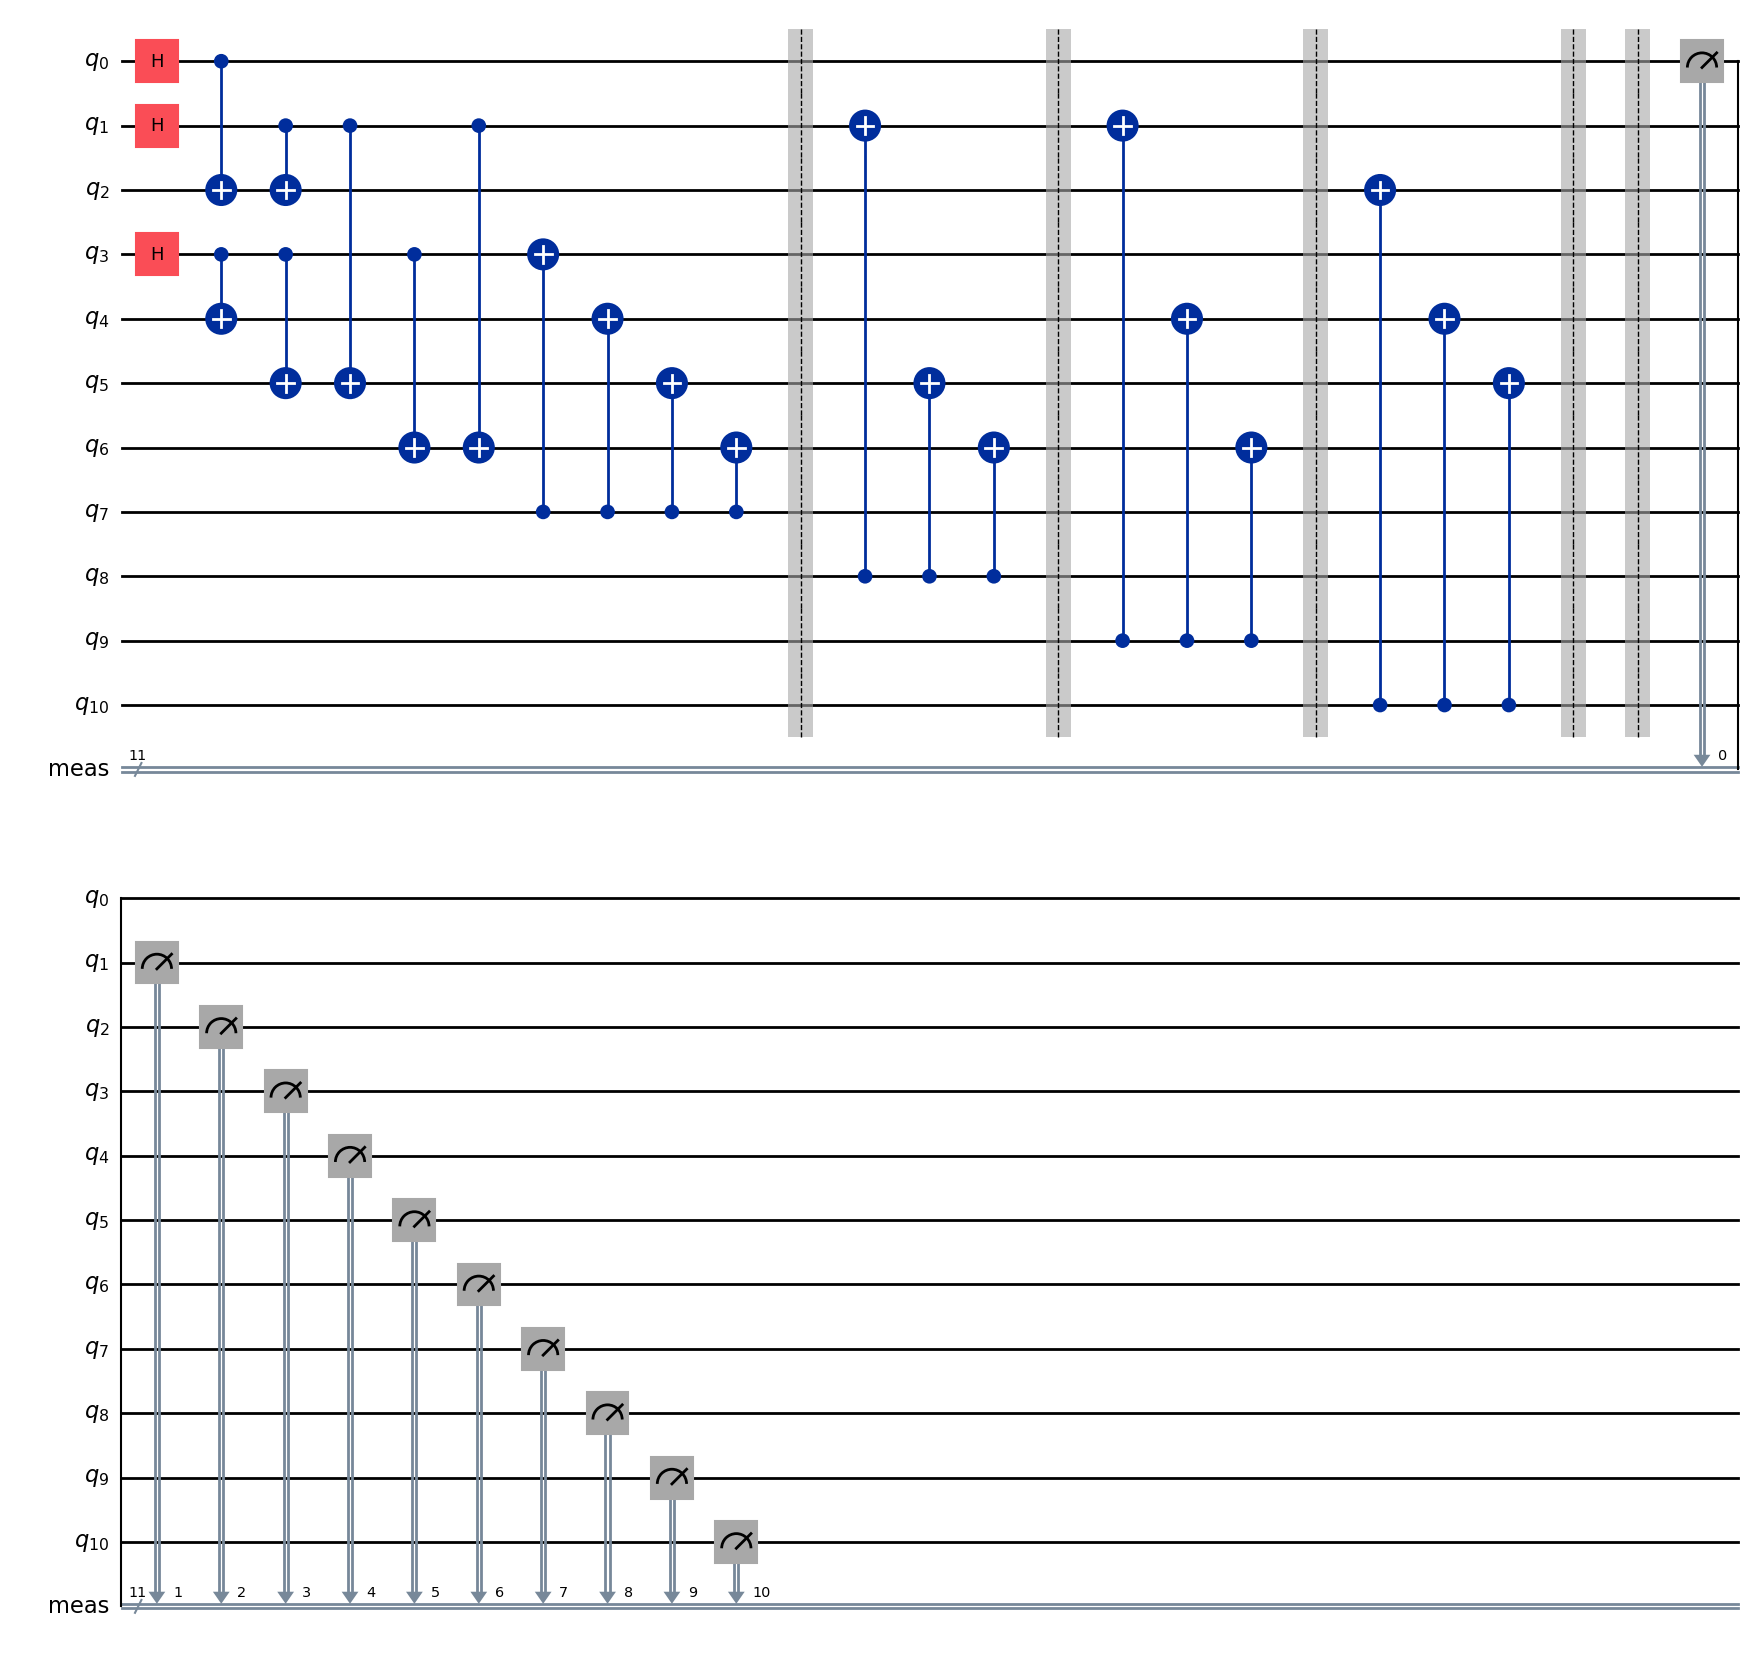

In [17]:
qc = QuantumCircuit(11)
qc = Steane(qc)

qc.cx(7, 3)
qc.cx(7, 4)
qc.cx(7, 5)
qc.cx(7, 6)

qc.barrier()

qc.cx(8, 1)
qc.cx(8, 5)
qc.cx(8, 6)

qc.barrier()

qc.cx(9, 1)
qc.cx(9, 4)
qc.cx(9, 6)

qc.barrier()

qc.cx(10, 2)
qc.cx(10, 4)
qc.cx(10, 5)

qc.barrier()

qc.measure_all()

qc.draw('mpl')

In [18]:
sampler = StatevectorSampler()
pub =(qc)
job_sampler =sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'00000011110': 1}


# Fault tolerant Pauli Z operator

In [20]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [21]:
for i in range(7):
  qc.z(i)

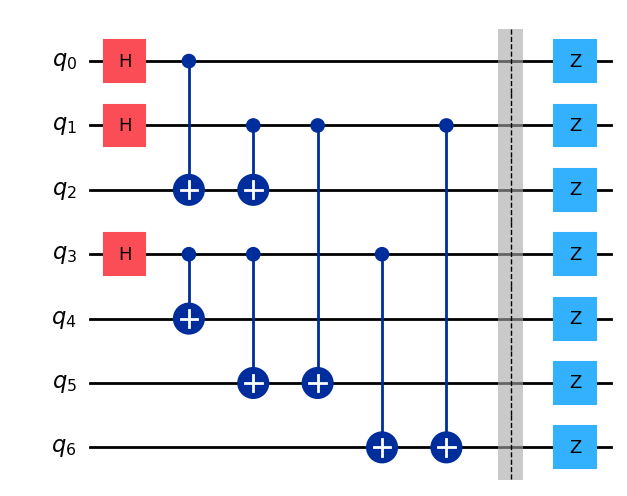

In [22]:
qc.draw('mpl')

# Fault tolerant Pauli X operator

In [23]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [24]:
for i in range(7):
  qc.x(i)

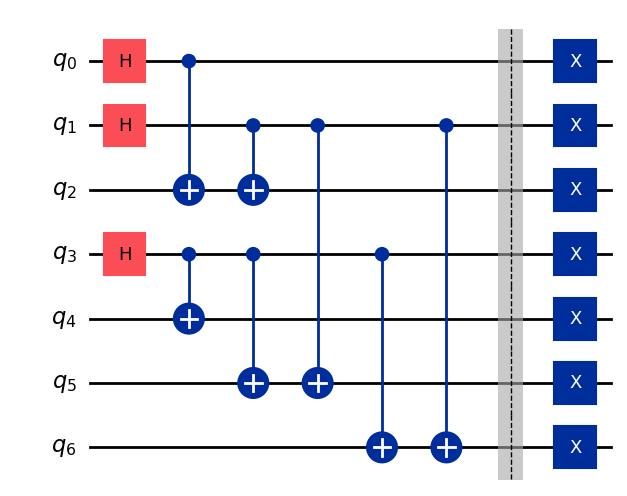

In [25]:
qc.draw('mpl')

# Fault tolerant Pauli Y operator

In [26]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [27]:
for i in range(7):
  qc.y(i)

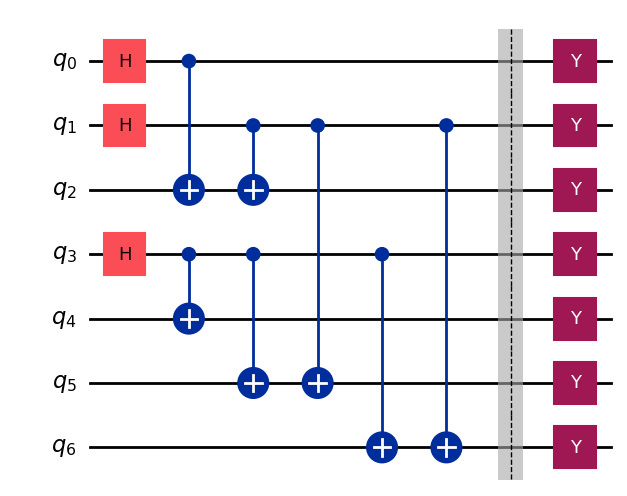

In [28]:
qc.draw('mpl')

# Fault tolerant Hadamard operator

In [29]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [30]:
for i in range(7):
  qc.h(i)

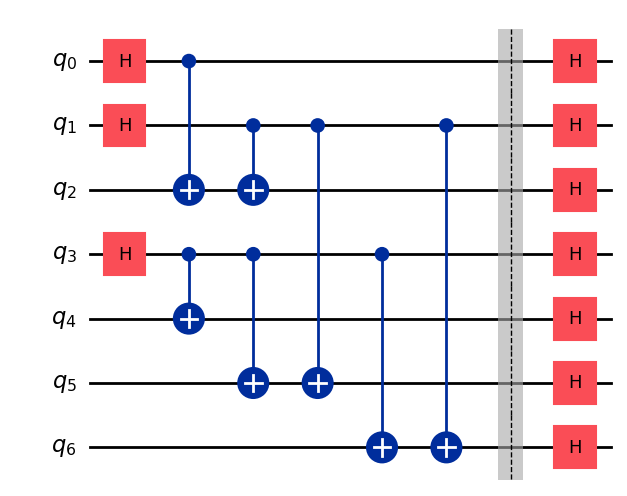

In [31]:
qc.draw('mpl')

# Fault tolerant Phase(S) operator

In [32]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

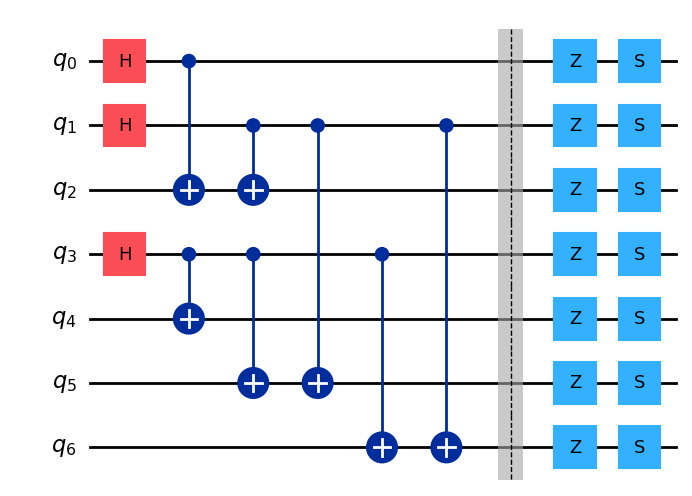

In [33]:
for i in range(7):
  qc.z(i)

for i in range(7):
  qc.s(i)

qc.draw('mpl')

# Fault tolerant CNOT operator

In [34]:
qc = QuantumCircuit(14)
qc = Steane(qc)
qc.barrier()
qc.h(7)
qc.h(8)
qc.cx(7, 9)
qc.cx(8, 9)
qc.h(10)
qc.cx(10, 11)
qc.cx(10, 12)
qc.cx(8, 12)
qc.cx(10, 13)
qc.cx(8, 13)
qc.barrier()
for i in range(7):
  qc.cx(i, i+7)

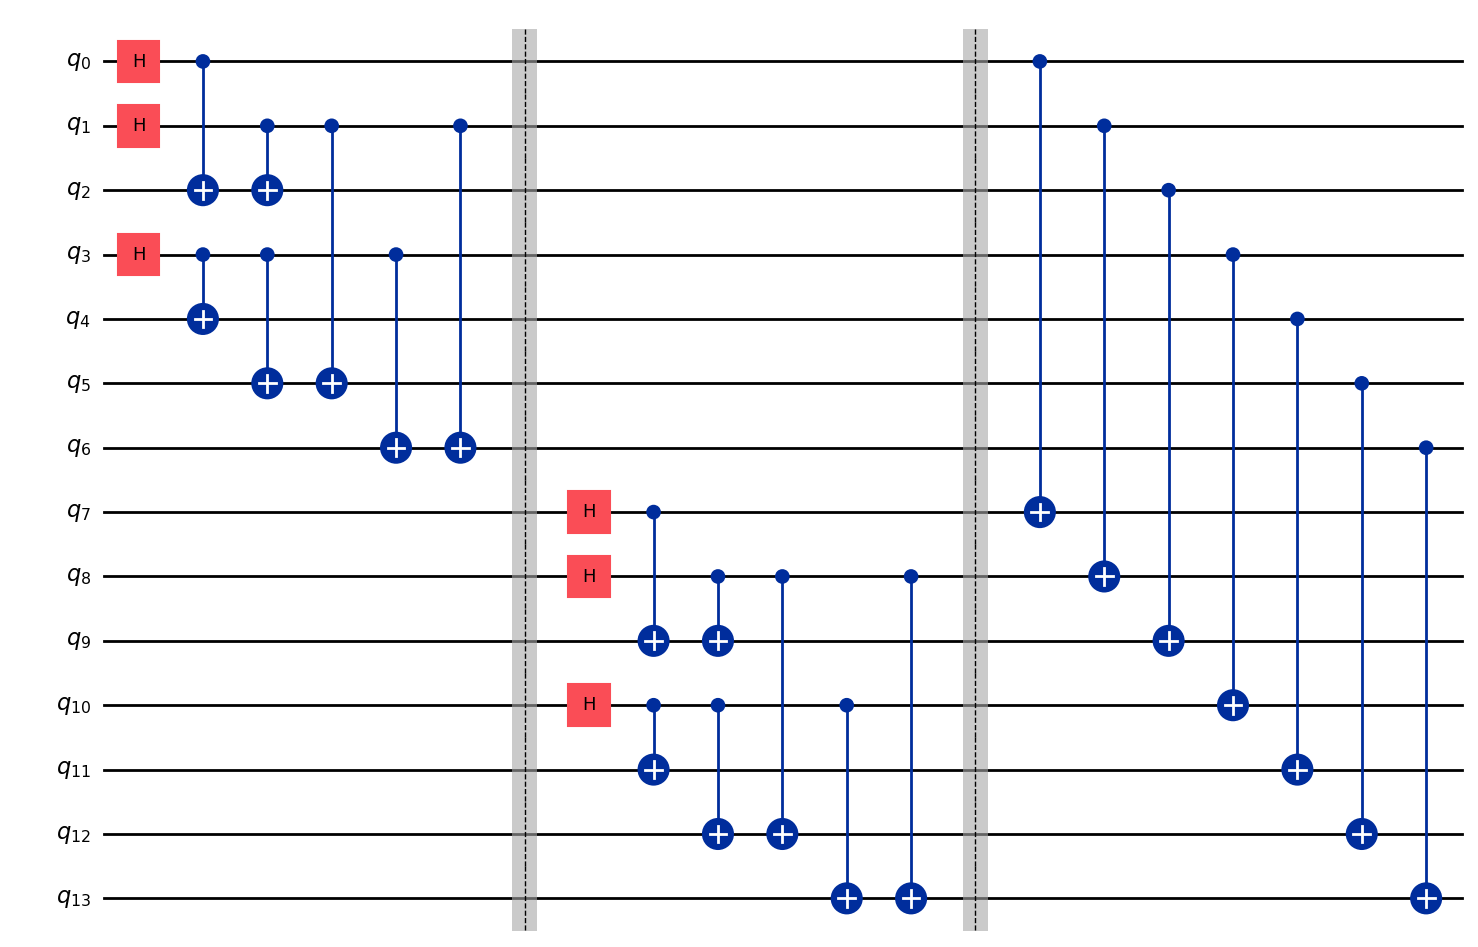

In [35]:
qc.draw('mpl')